In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

import warnings
warnings.filterwarnings('ignore')

# 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [23]:
tweets = pd.read_csv("D:\Assignment\Assignments-11\Elon_musk.csv",encoding='ISO 8859-1')
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [24]:
#Viewing teh length of the input twitter data
len(tweets.index)

1999

In [25]:
#Creating a column tweet with all the tweets in the Text column
tweets["Tweets"] = tweets["Text"]

In [26]:
from collections import Counter
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nishit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# i) RegEx for stopwords, Replace the symbol, '|' with ' '
# ii) Drop all stopwords
# iii) Generate DF out of Counter

In [10]:
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
words = (tweets.Tweets
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')
words_data

,Frequency
Word,
,243
&amp;,218
@erdayastronaut,140
@spacex,140
@ppathole,123
...,...
watch,7
<u+2192>,7
progress,7


In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shrut\AppData\Roaming\nltk_data...


VADER Sentiment Analyzer is used to perform the sentiment analysis.

In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nishit\AppData\Roaming\nltk_data...


True

# Visualizing the length of all tweets from the input data

Text(0, 0.5, 'Count')

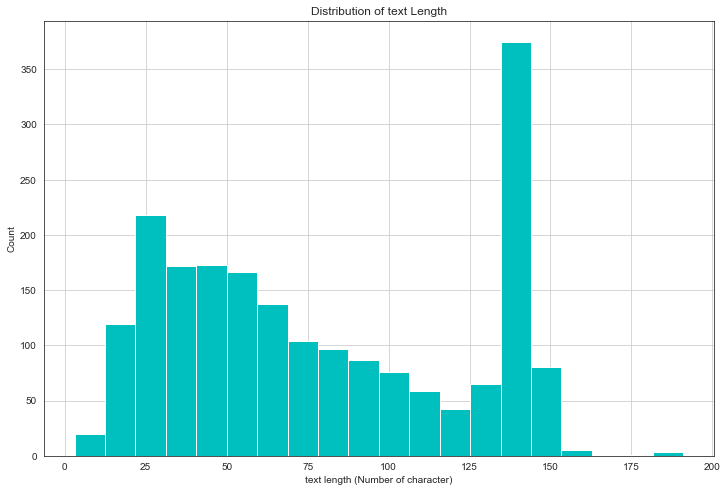

In [12]:
text_length = tweets["Tweets"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
text_length.loc[text_length < 1500].hist(color='c',bins=20)
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')

# Cleaning the input tweets for betting understanding to the Machine

In [13]:
# Converting all the reviews into a Lowercase text
tweets["Tweets"]= tweets["Tweets"].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [14]:
# Removing punctuations from the review
import string
tweets["Tweets"]=tweets["Tweets"].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [15]:
# Removing Numbers from the tweets and replacing it with nothing
tweets["Tweets"]=tweets["Tweets"].str.replace('[0-9]','')

C:\Users\Nishit\AppData\Local\Temp\ipykernel_2012\2920729510.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets["Tweets"]=tweets["Tweets"].str.replace('[0-9]','')


In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nishit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Loading the English stopwords from the nltk.corpus library
stop_words=stopwords.words('english')

In [18]:
# Removing the stopwords from the tweets
tweets["Tweets"]=tweets["Tweets"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [19]:
# Creating a user defined function to clean the tweets
import re
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_text(Tweets):
    Tweets = Tweets.lower()
    Tweets = re.sub('\[.*?\]', '', text)
    data = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    Tweets = re.sub('\w*\d\w*', '', text)
    Tweets = re.sub("[0-9" "]+"," ",text)
    Tweets = re.sub('[‘’“”…]', '', text)
    
    return Tweets

clean = lambda x: clean_Tweets(x)
tweets.head()

,Unnamed: 0,Text,Tweets
0,1,@kunalb11 Im an alien,kunalb im alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,idaacarmack ray tracing cyberpunk hdr nextleve...
2,3,@joerogan @Spotify Great interview!,joerogan spotify great interview
3,4,@gtera27 Doge is underestimated,gtera doge underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,teslacn congratulations tesla china amazing ex...


# Lemmatize all the words in the tweet to its root word

In [20]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nishit\AppData\Roaming\nltk_data...


True

In [21]:
from textblob import Word
tweets["Tweets"]= tweets["Tweets"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

ModuleNotFoundError: No module named 'textblob'

In [ ]:
# Replace all special characters and symbols
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
tweets["Tweets"]= tweets["Tweets"].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [ ]:
Tweets_set=tweets["Tweets"]
Tweets_set

# A user defined function to remove all the emoji's from the tweets

In [ ]:
import re
import sys

def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" 
                           u"\U0001F300-\U0001F5FF" 
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
def remove_emoji(Tweets_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" 
                               u"\U0001F300-\U0001F5FF" 
                               u"\U0001F680-\U0001F6FF" 
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002500-\U00002BEF" 
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Importing countvectorizer to create a bag of words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(tweets["Tweets"])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

# Creating TF-Idf vectorizer model, which allocates different weights to different words, rather than assigning equal weights, when compared to a bag of words model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(tweets["Tweets"])
print(TFIDF)

# Visualizing the Twitter data with word cloud, to see the highly commnly used words in the tweets

In [ ]:
Review_wordcloud = ' '.join(tweets["Tweets"])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

# Printing the frequency of the first 20 words in the whole Elon musk tweet

In [ ]:
freq = pd.Series(' '.join(tweets["Tweets"]).split()).value_counts()[0:20]
freq

In [ ]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

# Calculating the polarity score of the tweets

In [ ]:
from textblob import TextBlob
tweets['polarity'] = tweets["Tweets"].apply(lambda x: TextBlob(x).sentiment[0])
tweets[['Tweets','polarity']].head()

# Displaying top 5 positive posts of Category_A

In [ ]:
tweets[tweets.polarity>0].head()

# Dropping the Text column, from the original data

In [ ]:
tweets = tweets.drop(['Text'], axis = 1)
tweets

# Creating a user defined function to identify if the tweets are positive, negative or neutral

In [ ]:
def sent_type(Tweets): 
    for i in (Tweets):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')
sent_type(tweets['polarity'])

# Assigning that a tweet is positive or negative based on the polarity score value

In [ ]:
tweets["category"]=tweets['polarity']

tweets.loc[tweets.category > 0,'category']="Positive"
tweets.loc[tweets.category !='Positive','category']="Negative"

tweets["category"]=tweets["category"].astype('category')
tweets.dtypes

# Visualising the positive and the negative words in the Elon musk tweet on the whole

In [ ]:
sns.countplot(x='category',data=tweets,palette='hls')

In [ ]:
tweets.category.value_counts(normalize=True).mul(100)

# Visualising the positive and negative words used in the tweets, using Word cloud

In [ ]:
positive_reviews= tweets[tweets.category=='Positive']
negative_reviews= tweets[tweets.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Tweets.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Tweets.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

# Conclusion:
# From the model and the word cloud that we have created it is clear that, in the tweets, the most frequent words used includes amp,great,tesla,spacex etc.
# From the probabilties predicted by sentiment analysis, these tweets have 58% negative words and 42% positive words.

# 2) i) Extract reviews of any product from ecommerce website like amazon
# ii)Perform emotion mining

In [ ]:
import tweepy
import re 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [ ]:
samsung_reviews=[]

# Extracting reviews from amazon for product Samsung Galaxy S20

In [ ]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/product-reviews/B08444S68Q/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)    
    samsung_reviews = samsung_reviews+op

In [ ]:
samsung_reviews

In [ ]:
reviews = ' '.join(samsung_reviews)

# Data Cleaning

In [ ]:
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower() 
reviews = re.sub("[0-9" "]+"," ",reviews).lower() 
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()

# Tokenize

In [ ]:
reviews_token = word_tokenize(reviews)

In [ ]:
reviews_without_sw = [word for word in reviews_token if not word in stopwords.words()]
reviews_without_sw

In [ ]:
reviews=' '.join(reviews_without_sw)

# Word cloud

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)

# Emotion Mining

In [ ]:
with open(r"C:\Users\shrut\Downloads\negative-words.txt",encoding="ISO-8859-1") as f:
    negative=f.read().split("\n")

In [ ]:
negative = negative[35:]

In [ ]:
reviews_neg=' '.join([word for word in reviews_without_sw if word in negative])

# Word Cloud for negative word

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)

In [ ]:
with open(r"C:\Users\shrut\Downloads\positive-words.txt",encoding="ISO-8859-1") as f:
    positive=f.read().split("\n")

In [ ]:
reviews_pos=' '.join([word for word in reviews if word in positive])
positive = positive[35:]

In [ ]:
reviews_pos=' '.join([word for word in reviews_without_sw if word in positive])

# Word Cloud for positive words

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)